# **Table of Contents**

1. [Problem Statement](#section1)<br><br>

2. [Data Loading and Description](#section2)<br><br>

3. [Exploratory Data Analysis](#section3)<br><br>

4. [K Nearest Neighbors](#section4)<br><br>

    4.1. [Preparing X and y using pandas](#section401)<br><br>

    4.2. [Splitting X and y into training and test datasets](#section402)<br><br> 

    4.3. [K Nearest Neighbors in scikit-learn](#section403)<br><br>

    4.4. [Using the Model for Prediction](#section404)<br><br> 

5. [Naive Bayes Model](#section5)<br><br>

6. [Support Vector Machine  Model](#section6)<br><br> 

7. [Conclusion](#section7)<br><br>


<a id = section1></a>
### 1. Problem Statement 
The label defines the voice as male or female 
The main objective is to find a function that can predict wheter the voice belongs to the male or  a female using the 20 other features.This database’s goal is to help systems identify whether a voice is male or female based upon acoustic properties of the voice and speech.



<a id = section2></a>
### 2. Data Loading and Description 
The dataset comprises of 3168 observations of 21 columns. Below is a table showing names of all the columns and their description.

| Column Name | Description |
|----------------|-------------|
|meanfreq | mean frequency (in kHz) |
|sd |standard deviation of frequency |
|median | median frequency (in kHz) |
|Q25 | first quantile (in kHz) |
|Q75 | third quantile (in kHz) |
|IQR | interquantile range (in kHz) |
|skew | skewness (see note in specprop description) |
|kurt | kurtosis (see note in specprop description) |
|sp.ent | spectral entropy |
|sfm | spectral flatness |
|mode | mode frequency |
|centroid | frequency centroid (see specprop) |
|meanfun | mean fundamental frequency measured across acoustic signal |
|minfun | minimum fundamental frequency measured across acoustic signal |
|maxfun | maximum fundamental frequency measured across acoustic signal |
|meandom | mean of dominant frequency measured across acoustic signal |
|mindom | minimum of dominant frequency measured across acoustic signal |
|maxdom | maximum of dominant frequency measured across acoustic signal |
|dfrange | range of dominant frequency measured across acoustic signal |
|modindx |  modulation index |


####  Import Packages

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm

#### Importing Datasets

In [46]:
df = pd.read_csv("C:/Users/Tanu/Documents/data/voice.csv")

#### Features
There are twenty features. For example meanfreq, sd, median, Q25, Q75 etc.
Label is the target value which holds the character data which is Male and Female.

<a id = section3></a>
### 3. Exploratory Data Analysis (EDA)

In [38]:
df.shape

(3168, 21)

The datset contains 3168 rows and 21 columns.

In [4]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


The dataset contains 20 floating point  and 1 categorical feature.

In [8]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [49]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

import pandas_profiling
profile = df.profile_report(title='voice datset before data processing')
profile.to_file(output_file='voice dataset_before_preprocessing.html')

# To output the pandas profiling report on the notebook.

df.profile_report(title='Voice Pandas Profiling before Data Preprocessing', style={'full_width':True})

The Number of variables are 21, the number of observations are 3168, Missing cells are 0, Duplicate rows are 2, Total size in 
memory is 519.9 KB and Average record size in memory is 168.0.
Meanfreq , median, Q25, skew are highly correlated with centroid and should be ignored for analysis.

Text(0.5, 1, 'Correlation Matrix to Find out which Feature is most Related toLabel')

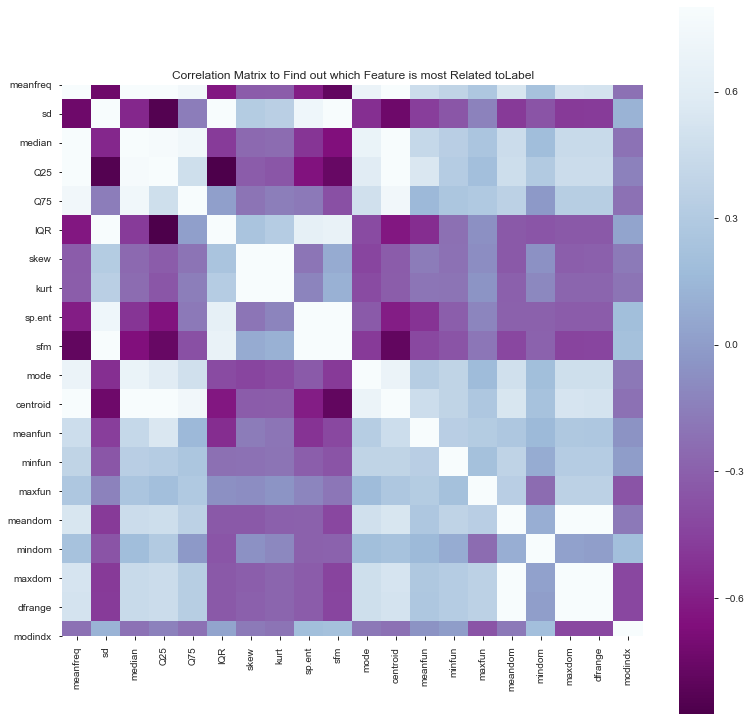

In [51]:
# Correlation Matrix Heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(corrmat, vmax=0.8, square=True, cmap='BuPu_r', linecolor ='black');
plt.title('Correlation Matrix to Find out which Feature is most Related toLabel')

Since the label data is categorical thus we need to perform some preprocessing on our dataset to make it much more readable.

#### Preprocessing the dataset

In [52]:
labelized = preprocessing.LabelEncoder()
df['label'] = labelized.fit_transform(df['label'])
labelized.classes_

array(['female', 'male'], dtype=object)

In [53]:
df[:] = preprocessing.MinMaxScaler().fit_transform(df)

In [54]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


Text(0.5, 1, 'Correlation Matrix to Find out which Feature is most Related toLabel')

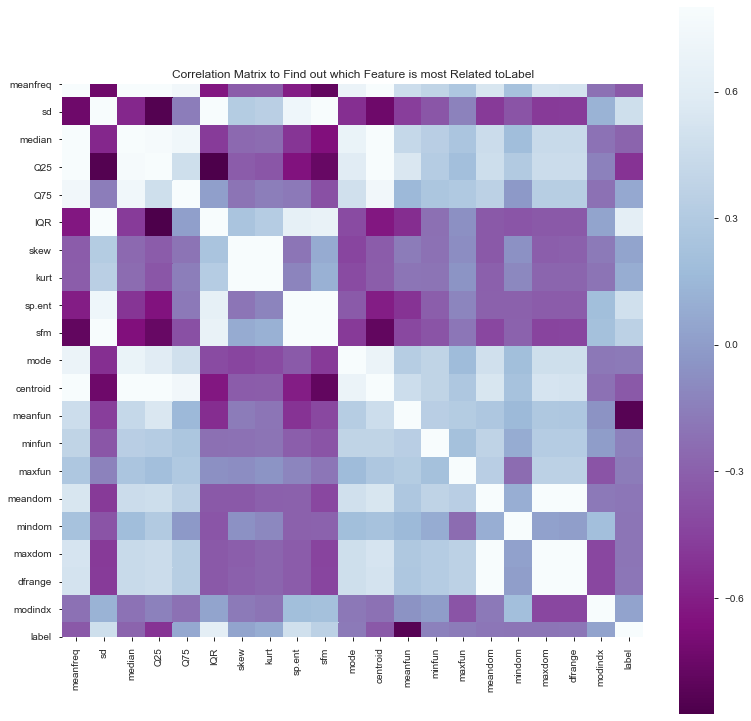

In [55]:
# Correlation Matrix Heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(corrmat, vmax=0.8, square=True, cmap='BuPu_r', linecolor ='black');
plt.title('Correlation Matrix to Find out which Feature is most Related toLabel')

From the baove heatmap it can clearly be stated that meanfunc is the most correlated with the label.

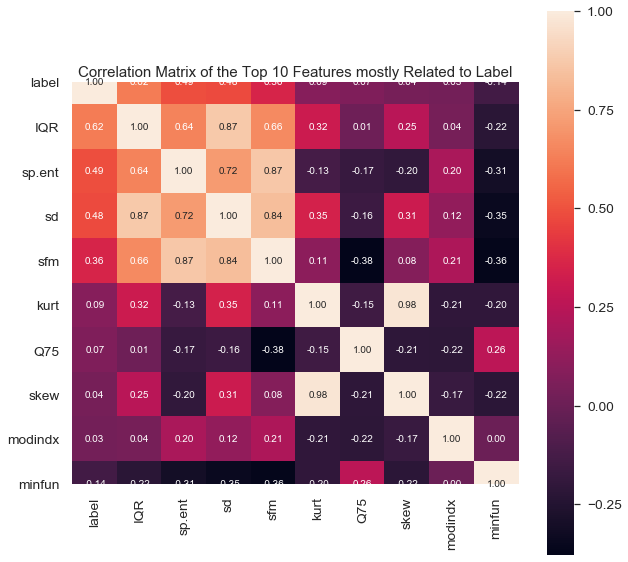

In [60]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'label')['label'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f1, ax1 = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Correlation Matrix of the Top 10 Features mostly Related to Label')
plt.show()

In [61]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,label
1,IQR
2,sp.ent
3,sd
4,sfm
5,kurt
6,Q75
7,skew
8,modindx
9,minfun


#### Understanding the dataset more via a Visualization 

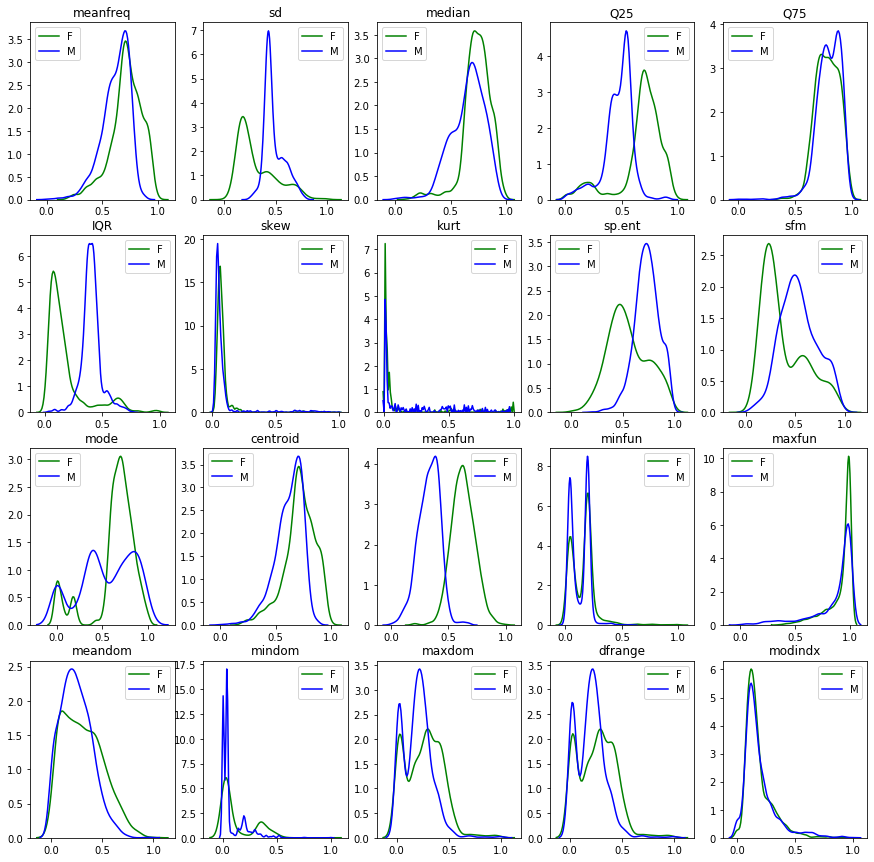

In [15]:

plt.subplots(4,5,figsize = (15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(df.columns[i-1])
    sns.kdeplot(df.loc[df['label'] == 0, df.columns[i-1]], color = 'green', label = 'F')
    sns.kdeplot(df.loc[df['label'] == 1, df.columns[i-1]], color = 'blue', label = 'M')


At first glance, most significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features.

#### Dealing With Missing Value 

In [63]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

No missing value in thsi dataset 

<a id = section4></a>
### 4.  K Nearest Neighbors

<a id = section401></a>
### 4.1. Preaparing X and Y using Pandas

<a id = section402></a>
### 4.2. Split X and Y into trainig and test datset

In [17]:
train, test = train_test_split(df , test_size = 0.3)

In [18]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2386,0.782215,0.206544,0.777772,0.775306,0.789030,0.077660,0.073956,0.006972,0.481652,0.309772,...,0.782215,0.528012,0.191170,0.972570,0.459376,0.040860,0.292352,0.291845,0.145123,0.0
2754,0.726048,0.162738,0.700725,0.698746,0.760354,0.129450,0.091387,0.013039,0.467126,0.212518,...,0.726048,0.597795,0.200741,0.972570,0.569411,0.040860,0.429593,0.429185,0.141055,0.0
2141,0.683701,0.173744,0.709642,0.683337,0.700000,0.086932,0.062464,0.004997,0.475006,0.264223,...,0.683701,0.555859,0.040081,0.791561,0.236592,0.333333,0.319871,0.313305,0.120866,0.0
741,0.595476,0.421622,0.649130,0.436460,0.721407,0.364390,0.034070,0.002111,0.812918,0.586187,...,0.595476,0.285026,0.035736,0.812749,0.235047,0.006452,0.298785,0.298999,0.184742,1.0
1709,0.894658,0.492686,0.964927,0.928203,0.966015,0.090347,0.079894,0.008118,0.475712,0.336321,...,0.894658,0.774032,0.058469,0.981526,0.152221,0.006452,0.093996,0.094063,0.182154,0.0


In [19]:
x_train =  train.iloc[:,:-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [20]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

<a id = section403></a>
### 4.3. K Nearest Neighbors in scikit-learn
Using neighbors.KNeighborsClassifier() to build the model.

In [21]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

<a id = section404></a>
### 4.4. Using the Model for prediction

In [23]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.019978969505783387 occurs at k=4.


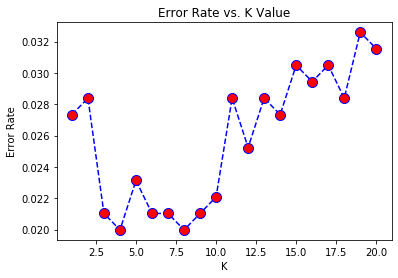

In [24]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [25]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9729    0.9873    0.9801       473
        male     0.9873    0.9728    0.9800       478

    accuracy                         0.9800       951
   macro avg     0.9801    0.9801    0.9800       951
weighted avg     0.9801    0.9800    0.9800       951



Lowest error is 0.029442691903259727 occurs at k=6.


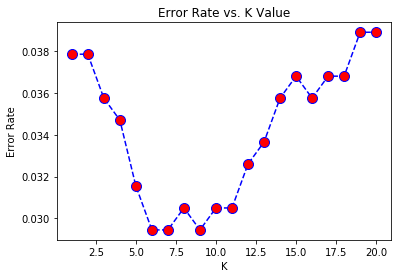

In [26]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

In [27]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9748    0.9831    0.9789       473
        male     0.9831    0.9749    0.9790       478

    accuracy                         0.9790       951
   macro avg     0.9790    0.9790    0.9790       951
weighted avg     0.9790    0.9790    0.9790       951



<a id = section5></a>
### 5. Naive Bayes
Using naive_bayes.GaussianNB() to build the model.

In [28]:
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9021    0.8964    0.8993       473
        male     0.8981    0.9038    0.9009       478

    accuracy                         0.9001       951
   macro avg     0.9001    0.9001    0.9001       951
weighted avg     0.9001    0.9001    0.9001       951



In [29]:
model=naive_bayes.GaussianNB()
classify(model,x_train3,y_train3,x_test3,y_test3)


              precision    recall  f1-score   support

      female     0.9638    0.9577    0.9608       473
        male     0.9584    0.9644    0.9614       478

    accuracy                         0.9611       951
   macro avg     0.9611    0.9611    0.9611       951
weighted avg     0.9611    0.9611    0.9611       951



<a id = section6></a>
### 6. Support Vector Machine
Using svm.SVC() to build the model.

In [30]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [31]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [32]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9810554803788903
rbf  out-of-sample accuracy in SVM:  0.9716088328075709
poly  in-sample accuracy in SVM:  0.9833107803337844
poly  out-of-sample accuracy in SVM:  0.9747634069400631
linear  in-sample accuracy in SVM:  0.9778980604420388
linear  out-of-sample accuracy in SVM:  0.9674027339642481
Highest accuracy is 0.9747634069400631 occurs at poly kernel.


Lowest error is 0.025236593059936908 occurs at C=1.


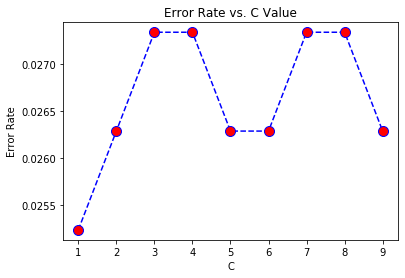

In [33]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [34]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9726    0.9767    0.9747       473
        male     0.9769    0.9728    0.9748       478

    accuracy                         0.9748       951
   macro avg     0.9748    0.9748    0.9748       951
weighted avg     0.9748    0.9748    0.9748       951



In [35]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.975191700496166
rbf  out-of-sample accuracy in SVM:  0.9652996845425867
poly  in-sample accuracy in SVM:  0.972936400541272
poly  out-of-sample accuracy in SVM:  0.964248159831756
linear  in-sample accuracy in SVM:  0.9675236806495264
linear  out-of-sample accuracy in SVM:  0.9600420609884333
Highest accuracy is 0.9652996845425867 occurs at rbf kernel.


Lowest error is 0.031545741324921134 occurs at C=4.


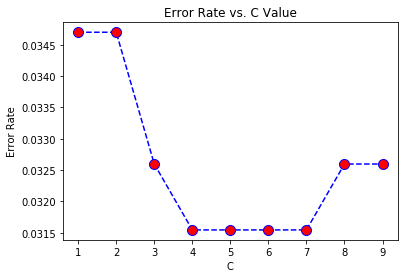

In [36]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

In [37]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9703    0.9662    0.9682       473
        male     0.9667    0.9707    0.9687       478

    accuracy                         0.9685       951
   macro avg     0.9685    0.9684    0.9685       951
weighted avg     0.9685    0.9685    0.9685       951



<a id = section7></a>
### 7. Conclusion

The Three algorithm have been compared in this like Nearest Neighbor, SVM, Naive Bayes
Accuracy is highest Nearest Neightbor which is 98 % followed by SVM wih 97 % followed by Naive Bayes 90 %
Thus in terms of Acuuracy the Nearest neighbor is the best but other are also doing great as they are giving accuracy more than 90%